In [1]:
%matplotlib inline
from data.dataLoader import *
import torch.utils.data as data
import numpy as np
from models.model_resnet import ResnetDispModel
from Validator import Validator
from trainer import Trainer

In [2]:
val_dataset = TwoViewDataset("data/dataset/", is_train=False, transforms=JointToTensor())
trn_dataset = TwoViewDataset("data/dataset/", is_train=True, transforms=JointCompose([JointRandomFlip(),JointToTensor(),JointRandomColorAug()]))

In [3]:
val_loader = data.DataLoader(val_dataset, batch_size=1, num_workers=1, shuffle=False)
trn_loader = data.DataLoader(trn_dataset, batch_size=8, num_workers=1, shuffle=True)

In [4]:
val_dataset[0]

(tensor([[[0.0824, 0.0902, 0.1255,  ..., 0.6471, 0.3451, 0.4314],
          [0.1255, 0.1176, 0.1294,  ..., 0.6667, 0.5412, 0.3843],
          [0.1059, 0.1098, 0.1333,  ..., 0.7412, 0.5961, 0.4275],
          ...,
          [0.0667, 0.0510, 0.0588,  ..., 0.3255, 0.2745, 0.2549],
          [0.0706, 0.0627, 0.0667,  ..., 0.3373, 0.2902, 0.2902],
          [0.0667, 0.0706, 0.0706,  ..., 0.4235, 0.4039, 0.4078]],
 
         [[0.0667, 0.0745, 0.1098,  ..., 0.5176, 0.3725, 0.2000],
          [0.1098, 0.1020, 0.1137,  ..., 0.6000, 0.4667, 0.3804],
          [0.0902, 0.0941, 0.1176,  ..., 0.7843, 0.5843, 0.4745],
          ...,
          [0.0588, 0.0431, 0.0510,  ..., 0.3882, 0.3451, 0.3412],
          [0.0627, 0.0549, 0.0588,  ..., 0.3765, 0.3529, 0.3569],
          [0.0588, 0.0627, 0.0627,  ..., 0.4392, 0.4392, 0.4549]],
 
         [[0.0549, 0.0627, 0.0980,  ..., 0.3961, 0.1059, 0.0745],
          [0.0980, 0.0902, 0.1020,  ..., 0.5686, 0.4510, 0.4118],
          [0.0784, 0.0824, 0.1059,  ...,

In [5]:
network = ResnetDispModel()

In [6]:
val = Validator(val_loader, 1, use_gpu=False)

In [7]:
opt = torch.optim.Adam(network.parameters(), lr=1e-4)

In [8]:
# val.validate(network)

In [8]:
trn = Trainer(network, trn_loader, opt, 8, use_gpu=False)

In [9]:
trn.setValidator(val)

In [10]:
print(trn.validator)

In [ ]:
trn.run_train(1)

/Users/lizhechen/opt/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


In [ ]:
trained_net = trn.net

In [ ]:
for left, right in val_loader:
    
    sample = left
    break
from matplotlib import pyplot as plt
sample_np = np.array(sample)
sample_np.shape
# sample.size()

In [ ]:
sample_np =np.transpose( np.squeeze(sample_np), axes=(1,2,0))
print(sample_np.shape)

In [ ]:
plt.imshow(sample_np)

In [ ]:
disp1, disp2, disp3, disp4 = trained_net(sample.cuda())

In [ ]:
disp1.size()

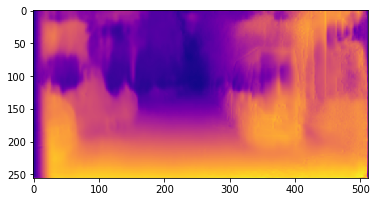

In [29]:
disp1_np = np.array(disp1.cpu().detach().numpy())
disp1_np =np.squeeze(disp1_np)[0]
plt.imshow(disp1_np, cmap="plasma")

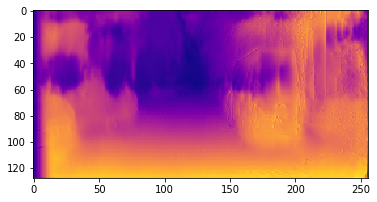

In [30]:
disp2_np = np.array(disp2.cpu().detach().numpy())
disp2_np =np.squeeze(disp2_np)[0]
plt.imshow(disp2_np, cmap="plasma")

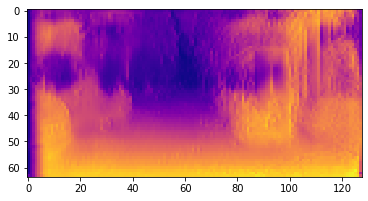

In [31]:
disp3_np = np.array(disp3.cpu().detach().numpy())
disp3_np =np.squeeze(disp3_np)[0]
plt.imshow(disp3_np, cmap="plasma")

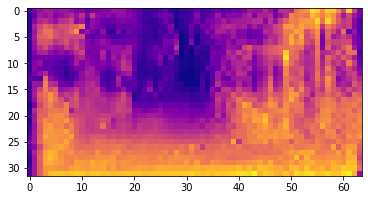

In [32]:
disp4_np = np.array(disp4.cpu().detach().numpy())
disp4_np =np.squeeze(disp4_np)[0]
plt.imshow(disp4_np, cmap="plasma")